In [1]:
import numpy as np
import pandas as pd

# Loads dataset from csv file
# Dataset retrieved from
df = pd.read_csv('star_classification.csv')
df = df.reindex(columns=['obj_ID','alpha','delta','u','g','r','i','z','run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','fiber_ID','redshift','plate','MJD','class'])
df = df.drop(columns=['rerun_ID'])
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,fiber_ID,redshift,plate,MJD,class
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,171,0.634794,5812,56354,GALAXY
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,1.176014e+19,427,0.779136,10445,58158,GALAXY
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,5.152200e+18,299,0.644195,4576,55592,GALAXY
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,1.030107e+19,775,0.932346,9149,58039,GALAXY
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,6.891865e+18,842,0.116123,6121,56187,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,2,581,1.055431e+19,438,0.000000,9374,57749,GALAXY
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,1,289,8.586351e+18,866,0.404895,7626,56934,GALAXY
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,4,308,3.112008e+18,74,0.143366,2764,54535,GALAXY
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,4,131,7.601080e+18,470,0.455040,6751,56368,GALAXY


In [2]:
from sklearn.model_selection import train_test_split
# Splits the dataset into training and test sets
X = df.drop(columns='class')
y = df['class']
X = X.to_numpy()
y = y.to_numpy()
# Note: same random_state used as sklearn tutorial example: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train_pre, X_rest, y_train, y_rest = train_test_split(X, y, test_size = 0.5, random_state = 42)
X_test_pre, X_val_pre, y_test, y_val = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)
X_train_pre

array([[1.23766114e+18, 1.60570204e+02, 3.87933152e+01, ...,
        5.54880200e-01, 4.63300000e+03, 5.56200000e+04],
       [1.23765154e+18, 1.93526046e+02, 6.75126083e+01, ...,
        4.80790700e-01, 6.96400000e+03, 5.67480000e+04],
       [1.23768031e+18, 2.28777155e+01, 3.02629986e+01, ...,
        1.91938300e+00, 7.73000000e+03, 5.81070000e+04],
       ...,
       [1.23766138e+18, 1.56991726e+02, 3.86124564e+01, ...,
        2.52848300e-04, 3.26200000e+03, 5.48840000e+04],
       [1.23767126e+18, 5.58294316e+01, 9.76439658e+00, ...,
        0.00000000e+00, 2.67900000e+03, 5.43680000e+04],
       [1.23766513e+18, 1.89902619e+02, 3.37795907e+01, ...,
        3.52528800e-01, 3.97100000e+03, 5.53220000e+04]])

In [3]:
from sklearn import preprocessing
# Use sklearn preprocessing to normalize both the training and test sets based on the training set
s = preprocessing.StandardScaler().fit(X_train_pre)
X_train = s.transform(X_train_pre)
X_test = s.transform(X_test_pre)
X_val = s.transform(X_val_pre)
X_train, X_test, X_val

(array([[-0.42423113, -0.17520082,  0.74644301, ..., -0.02830514,
         -0.16749721,  0.0205338 ],
        [-1.56250645,  0.16631444,  2.20679011, ..., -0.13018468,
          0.62120448,  0.64356439],
        [ 1.85015486, -1.60208249,  0.31268501, ...,  1.84800545,
          0.88038316,  1.39418371],
        ...,
        [-0.39506893, -0.21228393,  0.73724652, ..., -0.79096622,
         -0.63137967, -0.38598262],
        [ 0.77612481, -1.26060998, -0.72964824, ..., -0.79131391,
         -0.82863968, -0.67098598],
        [ 0.04898649,  0.12876554,  0.49150017, ..., -0.306556  ,
         -0.39148714, -0.14406117]]),
 array([[ 1.67766683,  1.74550721, -0.60363525, ..., -0.20929621,
          0.34713826,  0.3613227 ],
        [-0.82275773, -0.43618517,  0.88722332, ..., -0.35289479,
         -0.17730946,  0.22103035],
        [ 0.01568222,  0.23341547,  0.697055  , ..., -0.11415033,
         -0.3881036 ,  0.01114415],
        ...,
        [ 0.35843296, -0.25386258, -0.20756909, ..., -

In [4]:
from sklearn.neural_network import MLPClassifier
# Neural Network classifier with default values
# Uses ReLU activation, and one hidden layer with 100 neurons
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
mlp_train_acc = mlp.score(X_train, y_train)
mlp_test_acc = mlp.score(X_test, y_test)
print("Training set accuracy: ", round(mlp_train_acc * 100,2),"%", sep='')
print("Test set accuracy: ", round(mlp_test_acc * 100,2),"%", sep='')

Training set accuracy: 97.69%
Test set accuracy: 96.98%


In [5]:
from sklearn.neural_network import MLPClassifier
# Neural Network classifier with modified params
# Uses sigmoid activation, and one hidden layer with 100 neurons
mlp = MLPClassifier(activation='logistic',max_iter=400)
mlp.fit(X_train, y_train)
mlp_train_acc = mlp.score(X_train, y_train)
mlp_test_acc = mlp.score(X_test, y_test)
print("Training set accuracy: ", round(mlp_train_acc * 100,2),"%", sep='')
print("Test set accuracy: ", round(mlp_test_acc * 100,2),"%", sep='')

Training set accuracy: 97.49%
Test set accuracy: 97.11%


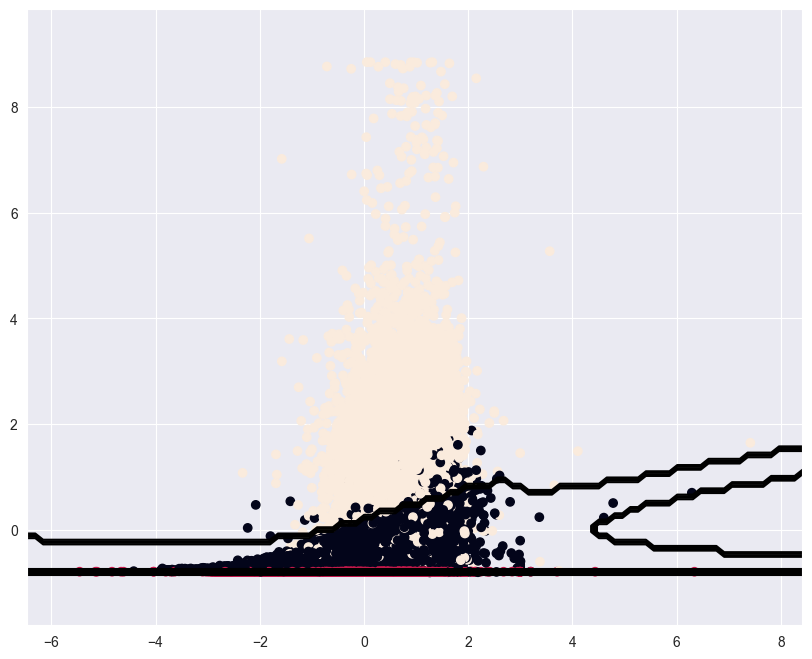

In [6]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

# Plotting the neural network decision boundaries with 2 of the features (i and redshift)
y_train_colors = np.zeros(len(y_train))
for i in range(0, len(y_train)):
    if y_train[i] == 'GALAXY':
        y_train_colors[i] = 0
    elif y_train[i] == 'STAR':
        y_train_colors[i] = 1
    else:
        y_train_colors[i] = 2

nn_model = MLPClassifier(activation='logistic',max_iter=400)
nn_model.fit(X_train[:,[6,13]], y_train)

# References to tutorial for plotting SVMs from sklearn: https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html#sphx-glr-auto-examples-svm-plot-linearsvc-support-vectors-py
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:,6], X_train[:,13], c=y_train_colors[:])
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(nn_model, X_train[:, [6,13]], ax=ax, colors='k', plot_method='contour')
plt.show()

C:\Users\mattd\anaconda3\envs\sk\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


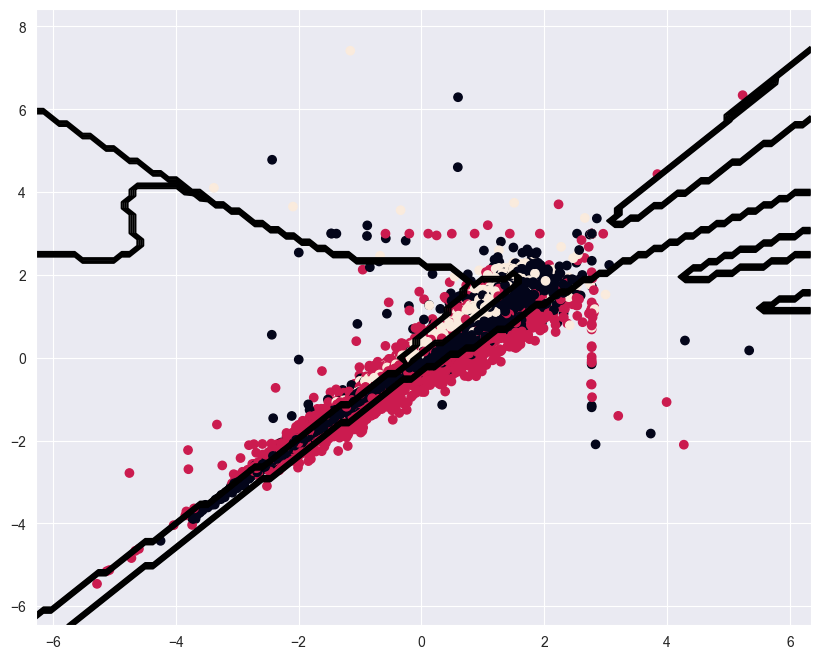

In [7]:
# Plotting the neural network decision boundaries with 2 of the features (r and i)
nn_model = MLPClassifier(activation='logistic',max_iter=400)
nn_model.fit(X_train[:,[5,6]], y_train)

# References to tutorial for plotting SVMs from sklearn: https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html#sphx-glr-auto-examples-svm-plot-linearsvc-support-vectors-py
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:,5], X_train[:,6], c=y_train_colors[:])
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(nn_model, X_train[:, [5,6]], ax=ax, colors='k', plot_method='contour')
plt.show()

In [8]:
from sklearn.neural_network import MLPClassifier
# Neural Network classifier with modified params
# Uses sigmoid activation, and one hidden layer with 100 neurons
mlp = MLPClassifier(hidden_layer_sizes=(200,),activation='logistic',max_iter=400)
mlp.fit(X_train, y_train)
mlp_train_acc = mlp.score(X_train, y_train)
mlp_test_acc = mlp.score(X_test, y_test)
print("Training set accuracy: ", round(mlp_train_acc * 100,2),"%", sep='')
print("Test set accuracy: ", round(mlp_test_acc * 100,2),"%", sep='')

Training set accuracy: 97.57%
Test set accuracy: 97.03%
